# 金融和经济数据应用

从2005年开始,Python在金融行业中的应用越来越多,这主要得
益于众多**成熟**的函数库(NumPy和pandas)以及大量经验丰富的Python
程序员。许多机构都发现Python不仅非常适合成为**交互式**的分析环
境,也非常适合开发**稳健**的系统,而且所需的时间比Java或C++少得
多。Python还是一种非常好的**粘合层**,可以非常轻松地为C或C++编写
的库构建Python**接口**。


金融分析领域的内容博大精深,甚至拿一整本书来讲都不为过,
在这里我只是希望告诉你如何利用本书中的工具去解决金融领域中的
一些特殊问题。跟其他的研究和分析领域一样,在**数据规整化**方面所
花费的精力常常会比解决**核心建模**和研究问题所花费的要多得多。就
是因为找不到合适的数据处理工具,所以我才在2008年开始创立
pandas的。


在本章的示例中,我将使用术语“**截面**”(cross-section)来表示某
个时间点的数据。例如,标准普尔500指数中所有成分股在特定日期的
收盘价就形成了一个截面。多个数据项(例如价格和成交量)在多个时
间点的截面数据就构成了一个**面板**(panel)。面板数据既可以被表示为
**层次化**索引的DataFrame,也可以被表示为**三维**的Panel pandas对象。

In [1]:
import pandas as pd
from pandas import Series,DataFrame

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## 数据规整化

### 时间序列以及截面对齐

在处理金融数据时,最费神的一个问题就是所谓的“**数据对
齐**”(data alignment)问题。两个相关的时间序列的索引可能**没有**很好
的对齐,或两个DataFrame对象可能含有**不匹配**的列或行。MATLAB、
R以及其他矩阵编程语言的用户常常需要花费大量的精力将数据规整
化为完全对齐的形式。以我的经验来看,手工处理数据对齐问题是一
件令人非常郁闷的工作,而验证数据是否对齐则还要更郁闷一些。不
仅如此,合并未对齐的数据还很有可能带来各种bug。

In [2]:
df1 = DataFrame(np.arange(9).reshape(3,3),
               columns=['a','b','c'],
               index=['hl','mk','jk'])

df2 = DataFrame(np.arange(9).reshape(3,3),
               columns=['d','b','c'],
               index=['ph','mk','jk'])
print df1
print '\n'
print df2

    a  b  c
hl  0  1  2
mk  3  4  5
jk  6  7  8


    d  b  c
ph  0  1  2
mk  3  4  5
jk  6  7  8


#### pandas在算术中的自动对齐

In [8]:
df1 + df2

,a,b,c,d
hl,NaN,NaN,NaN,NaN
jk,NaN,14.0,16.0,NaN
mk,NaN,8.0,10.0,NaN
ph,NaN,NaN,NaN,NaN


#### DataFrame的align方法 -- 返回一个元组，是两个对象的重索引版本

In [10]:
df1.align(df2, join='outer')

(      a    b    c   d
 hl  0.0  1.0  2.0 NaN
 jk  6.0  7.0  8.0 NaN
 mk  3.0  4.0  5.0 NaN
 ph  NaN  NaN  NaN NaN,      a    b    c    d
 hl NaN  NaN  NaN  NaN
 jk NaN  7.0  8.0  6.0
 mk NaN  4.0  5.0  3.0
 ph NaN  1.0  2.0  0.0)

#### 通过索引不同的Series构建DataFrame

In [12]:
se1 = Series(np.arange(3),index=['a','b','c'])
se2 = Series(np.arange(3),index=['d','b','c'])
se3 = Series(np.arange(3),index=['d','e','c'])

DataFrame({'col 1':se1,'col 2':se2,'col 3':se3}, index=list('bcd')) # 显示指定索引，丢弃其他

,col 1,col 2,col 3
b,1.0,1,NaN
c,2.0,2,2.0
d,NaN,0,0.0


### 频率不同的时间序列的运算

经济学时间序列常常有着按年、季、月、日计算的或其他更特殊
的频率。有些完全就是**不规则**的,比如说,盈利预测调整随时都可能会
发生。**频率转换**和**重对齐**的两大主要工具是**resample**和**reindex**方法。

* resample：用于将数据转换到固定频率，支持插值(如前向填充)逻辑。
* reindex：用于使数据符合一个新索引，支持插值(如前向填充)逻辑。

#### 周型时间序列

In [13]:
se_week = Series(np.arange(5),index=pd.date_range('2012/01/01',periods=5,freq='W-WED'))
se_week

2012-01-04    0
2012-01-11    1
2012-01-18    2
2012-01-25    3
2012-02-01    4
Freq: W-WED, dtype: int64

#### 重采样到工作日(星期一到星期五)频率

In [16]:
se_week.resample('B').mean() # 升采样，出现大量NaN

2012-01-04    0.0
2012-01-05    NaN
2012-01-06    NaN
2012-01-09    NaN
2012-01-10    NaN
2012-01-11    1.0
2012-01-12    NaN
2012-01-13    NaN
2012-01-16    NaN
2012-01-17    NaN
2012-01-18    2.0
2012-01-19    NaN
2012-01-20    NaN
2012-01-23    NaN
2012-01-24    NaN
2012-01-25    3.0
2012-01-26    NaN
2012-01-27    NaN
2012-01-30    NaN
2012-01-31    NaN
2012-02-01    4.0
Freq: B, dtype: float64

#### 填充重采样产生的NaN值

In [19]:
se_week.resample('B').ffill() # NaN值前向填充

2012-01-04    0
2012-01-05    0
2012-01-06    0
2012-01-09    0
2012-01-10    0
2012-01-11    1
2012-01-12    1
2012-01-13    1
2012-01-16    1
2012-01-17    1
2012-01-18    2
2012-01-19    2
2012-01-20    2
2012-01-23    2
2012-01-24    2
2012-01-25    3
2012-01-26    3
2012-01-27    3
2012-01-30    3
2012-01-31    3
2012-02-01    4
Freq: B, dtype: int64

#### 重对齐的应用 -- 将se_week与se_no相加

这种情况下，一般优先考虑将低频数据升采样到高频数据，这样不会产生数据丢失的问题，而空数据可以使用各种填充方式去填充；

In [25]:
dates = pd.DatetimeIndex(['2012/01/01','2012/01/022','2012/02/08','2012/03/11','2012/05/12'])
se_no = Series(np.arange(5),index=dates)
se_no

2012-01-01    0
2012-01-22    1
2012-02-08    2
2012-03-11    3
2012-05-12    4
dtype: int64

##### 先将se_week重对齐到se_no的索引上

In [29]:
se_week

2012-01-04    0
2012-01-11    1
2012-01-18    2
2012-01-25    3
2012-02-01    4
Freq: W-WED, dtype: int64

In [27]:
se_week_ridx = se_week.reindex(se_no.index,method='ffill')
se_week_ridx

2012-01-01    NaN
2012-01-22    2.0
2012-02-08    4.0
2012-03-11    4.0
2012-05-12    4.0
dtype: float64

##### 相加

In [28]:
se_no + se_week_ridx

2012-01-01    NaN
2012-01-22    3.0
2012-02-08    6.0
2012-03-11    7.0
2012-05-12    8.0
dtype: float64

### 使用Period -- 时间区间，而不同于Timestamp的时间点

Period(表示时间区间)提供了另一种处理不同频率时间序列的办
法,尤其是那些有着特殊规范的以年或季度为频率的金融或经济序
列。比如说,一个公司可能会发布其以6月结尾的财年的每季度盈利报
告,即频率为Q-JUN。

#### 举个栗子

In [31]:
# gdp，季度型时区
gdp = Series([1.78, 1.94, 2.08, 2.01, 2.15, 2.31, 2.46],index=pd.period_range('1984Q2', periods=7, freq='Q-SEP'))
# 通货膨胀，年度型时区
infl = Series([0.025, 0.045, 0.037, 0.04],index=pd.period_range('1982', periods=4, freq='A-DEC'))

In [34]:
gdp

1984Q2    1.78
1984Q3    1.94
1984Q4    2.08
1985Q1    2.01
1985Q2    2.15
1985Q3    2.31
1985Q4    2.46
Freq: Q-SEP, dtype: float64

In [35]:
infl

1982    0.025
1983    0.045
1984    0.037
1985    0.040
Freq: A-DEC, dtype: float64

In [38]:
# 直接重对齐infl会报以下错误，原因是PeriodIndex不一致导致的，因此需要先显示转换二者的索引到统一的freq上
# Input has different freq=Q-SEP from PeriodIndex(freq=A-DEC)
# infl.reindex(gdp.index,method='ffill')

跟Timestamp的时间序列不同,由Period索引的两个不同频率的
时间序列之间的运算必须进行**显式转换**。在本例中,假设已知infl值是
在每年**年末**观测的,于是我们就可以将其转换到Q-SEP以得到该频率
下的正确时期:

##### 显示转换年度型时区到季度型时区

In [32]:
infl_q = infl.asfreq('Q-SEP', how='end')
infl_q

1983Q1    0.025
1984Q1    0.045
1985Q1    0.037
1986Q1    0.040
Freq: Q-SEP, dtype: float64

##### 重对齐

In [33]:
infl_q.reindex(gdp.index, method='ffill')

1984Q2    0.045
1984Q3    0.045
1984Q4    0.045
1985Q1    0.037
1985Q2    0.037
1985Q3    0.037
1985Q4    0.037
Freq: Q-SEP, dtype: float64

### 时间和“最当前”数据选取

假设你有一个很长的盘中市场数据时间序列,现在希望抽取其中
每天**特定时间**的价格数据。如果数据**不规整**(观测值没有精确地落在
期望的时间点上),该怎么办?

#### 数据

In [41]:
# 生成一个交易日内的日期范围和时间序列
rng = pd.date_range('2012-06-01 09:00','2012-06-01 15:59', freq='T')
# 生成5天的时间点(9:30~15:59之间的值)
rng = rng.append([rng + pd.offsets.BDay(i) for i in range(1, 4)])
ts = Series(np.arange(len(rng), dtype=float), index=rng)
ts.head(5)

2012-06-01 09:00:00    0.0
2012-06-01 09:01:00    1.0
2012-06-01 09:02:00    2.0
2012-06-01 09:03:00    3.0
2012-06-01 09:04:00    4.0
dtype: float64

#### 利用datetime.time实例索引数据

In [42]:
from datetime import time
ts[time(10,0)] # 索引十点整的数据

2012-06-01 10:00:00      60.0
2012-06-04 10:00:00     480.0
2012-06-05 10:00:00     900.0
2012-06-06 10:00:00    1320.0
dtype: float64

#### 使用at_time获取指定时间点数据

In [50]:
ts.at_time(time(11,5))

2012-06-01 11:05:00     125.0
2012-06-04 11:05:00     545.0
2012-06-05 11:05:00     965.0
2012-06-06 11:05:00    1385.0
dtype: float64

#### 使用between_time获取指定时间段数据 -- 包头包尾

In [54]:
ts.between_time(time(11,5),time(11,7))

2012-06-01 11:05:00     125.0
2012-06-01 11:06:00     126.0
2012-06-01 11:07:00     127.0
2012-06-04 11:05:00     545.0
2012-06-04 11:06:00     546.0
2012-06-04 11:07:00     547.0
2012-06-05 11:05:00     965.0
2012-06-05 11:06:00     966.0
2012-06-05 11:07:00     967.0
2012-06-06 11:05:00    1385.0
2012-06-06 11:06:00    1386.0
2012-06-06 11:07:00    1387.0
dtype: float64

#### 获取时间点无数据的情况 -- asof（获取当前点或之前最近的值）

In [70]:
ts_nan = ts.copy()
ts_nan[np.random.permutation(len(ts_nan))[:int(len(ts_nan)/1.6)]] = np.nan
ts_nan[:10]

2012-06-01 09:00:00    0.0
2012-06-01 09:01:00    NaN
2012-06-01 09:02:00    2.0
2012-06-01 09:03:00    3.0
2012-06-01 09:04:00    NaN
2012-06-01 09:05:00    NaN
2012-06-01 09:06:00    6.0
2012-06-01 09:07:00    7.0
2012-06-01 09:08:00    NaN
2012-06-01 09:09:00    NaN
dtype: float64

In [71]:
ts_nan[time(10,0)] # 直接获取有NaN值

2012-06-01 10:00:00     60.0
2012-06-04 10:00:00      NaN
2012-06-05 10:00:00    900.0
2012-06-06 10:00:00      NaN
dtype: float64

In [72]:
# 此处不接收datetime.time类型输入
ts_nan.asof(pd.date_range('2012/06/01 10:00',periods=4,freq='B'))

2012-06-01 10:00:00      60.0
2012-06-04 10:00:00     475.0
2012-06-05 10:00:00     900.0
2012-06-06 10:00:00    1317.0
Freq: B, dtype: float64

### 拼接多个数据源

在金融或经济领域中,还有另外几个经常出现的情况:
* 在一个特定的时间点上,从一个数据源切换到另一个数据源。
* 用另一个时间序列对当前时间序列中的缺失值“打补丁”。
* 将数据中的符号(国家、资产代码等)替换为实际数据。

#### 数据中间时间段确实了一部分 -- concat

In [80]:
se1 = Series(np.arange(3),pd.date_range('2012/01/01',periods=3,freq='D')).append(
    Series(np.arange(3),pd.date_range('2012/01/07',periods=3,freq='D')))
se2 = Series(np.arange(3),pd.date_range('2012/01/04',periods=3,freq='D'))

In [81]:
se1

2012-01-01    0
2012-01-02    1
2012-01-03    2
2012-01-07    0
2012-01-08    1
2012-01-09    2
dtype: int64

In [82]:
se2

2012-01-04    0
2012-01-05    1
2012-01-06    2
Freq: D, dtype: int64

In [84]:
pd.concat([se1.loc[:'2012/01/04'],se2,se1.loc['2012/01/04':]])

2012-01-01    0
2012-01-02    1
2012-01-03    2
2012-01-04    0
2012-01-05    1
2012-01-06    2
2012-01-07    0
2012-01-08    1
2012-01-09    2
dtype: int64

#### combine_first -- 上述问题用该方法更简便

In [85]:
se1.combine_first(se2)

2012-01-01    0.0
2012-01-02    1.0
2012-01-03    2.0
2012-01-04    0.0
2012-01-05    1.0
2012-01-06    2.0
2012-01-07    0.0
2012-01-08    1.0
2012-01-09    2.0
Freq: D, dtype: float64

#### DataFrame.update -- 实现就地更新，如果指向填充NaN值，需指定overwrite为False

#### 直接通过索引去设置

### 收益指数和累计指数

在金融领域中,收益(return)通常指的是某资产价格的百分比变化。

#### 加载苹果股票数据

In [135]:
from pandas_datareader import data as web
price = web.get_data_yahoo('AAPL', '2011-01-01')['Adj Close']
price[-5:]

Date
2018-04-16    175.820007
2018-04-17    178.240005
2018-04-18    177.839996
2018-04-19    172.800003
2018-04-20    165.720001
Name: Adj Close, dtype: float64

#### 简单计算回报率 -- 注意非工作日是没有数据的，因此通过pd.tseries.offsets.BDay来获取工作日，注意传入0，如果传入1会跳后一天

In [124]:
workday_20170416 = pd.datetime(2017,4,16) + pd.tseries.offsets.BDay(0)
price[workday_20170416]

139.621262

In [125]:
workday_20180416 = pd.datetime(2018,4,16) + pd.tseries.offsets.BDay(0)
price[workday_20180416]

175.820007

In [126]:
price[workday_20180416] / price[workday_20170416] - 1

0.25926384335360031

#### 收益指数 -- 苹果11年以来收益比例持续下跌

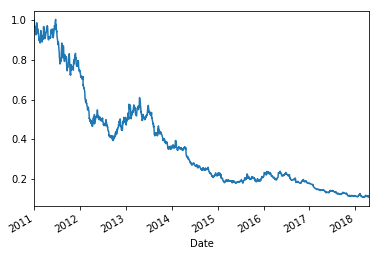

In [137]:
ret = (1-price.pct_change()).cumprod()
ret[0]=1
ret.plot()

#### 累计收益

##### 先重采样到每月最后一个工作日

In [143]:
ret_bm = ret.resample('BM').last()
ret_bm[:5]

Date
2010-12-31    1.000000
2011-01-31    0.946717
2011-02-28    0.906364
2011-03-31    0.913337
2011-04-29    0.906775
Freq: BM, Name: Adj Close, dtype: float64

##### 计算累计收益的百分比变化

In [142]:
ret_bm.pct_change()[:5]

Date
2010-12-31         NaN
2011-01-31   -0.053283
2011-02-28   -0.042624
2011-03-31    0.007693
2011-04-29   -0.007185
Freq: BM, Name: Adj Close, dtype: float64

## 分组变换和分析

## 示例应用